In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from causalgraphicalmodels import CausalGraphicalModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from causalnex.structure.notears import from_pandas, from_pandas_lasso
import pygraphviz
from causalnex.inference import InferenceEngine
from causalnex.evaluation import roc_auc
from causalnex.evaluation import classification_report
from causalnex.network import BayesianNetwork

%matplotlib inline

ModuleNotFoundError: No module named 'pygraphviz'

## Data preprocessing and exploration

In [2]:
dataset = pd.read_csv("C:/Users/DESMOND/Causality/data/data.csv")

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#checking data types and missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# summary of measures
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<ipython-input-7-39d170911b84>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('Category')


Text(0.5, 1.0, 'Frequency of Diagnosis')

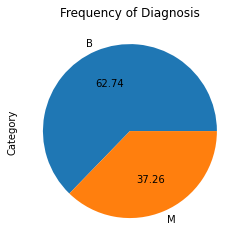

In [7]:
#pie chart showing the proportion of M = Malignant(presence of cancer cells) compared to B = Benign(absence of cancer cells)
dataset.groupby('diagnosis').size().plot(kind='pie', autopct='%.2f')
plt.axes().set_ylabel('Category')
plt.title('Frequency of Diagnosis')

In [8]:
#Plot histograms of "_mean" variables group by diagnosis
df = dataset[['diagnosis', "radius_mean", "texture_mean","perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean"]].copy()
# df.plot.hist(subplots = True,  layout = (3,4), figsize = (8,6))
# df.pivot(columns='diagnosis').radius_mean.plot.hist()
def diag(col):
    M = df[df['diagnosis'] == 'M'][col]
    B = df[df['diagnosis'] == 'B'][col]
    return M, B

plt.figure(figsize=(16, 8))
for num, alpha in enumerate(df.columns):
    plt.subplot(3, 4, num+1)
    plt.hist(diag(alpha)[0], bins=25, alpha=0.5, label='malignant', color='b')
    plt.hist(diag(alpha)[1], bins=25, alpha=0.5, label='benign', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


KeyError: "['concave_points_mean'] not in index"

In [9]:
#Plot histograms of "_se" variables group by diagnosis
df = dataset[['diagnosis', "radius_se", "texture_se","perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se"]].copy()
# df.plot.hist(subplots = True,  layout = (3,4), figsize = (8,6))
# df.pivot(columns='diagnosis').radius_mean.plot.hist()
def diag(col):
    M = df[df['diagnosis'] == 'M'][col]
    B = df[df['diagnosis'] == 'B'][col]
    return M, B
    
plt.figure(figsize=(16, 8))
for num, alpha in enumerate(df.columns):
    plt.subplot(3, 4, num+1)
    plt.hist(diag(alpha)[0], bins=25, alpha=0.5, label='malignant', color='b')
    plt.hist(diag(alpha)[1], bins=25, alpha=0.5, label='benign', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

KeyError: "['concave_points_se'] not in index"

In [10]:
#Plot histograms of "_worst" variables group by diagnosis
df = dataset[['diagnosis', "radius_worst", "texture_worst","perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"]].copy()
# df.plot.hist(subplots = True,  layout = (3,4), figsize = (8,6))
# df.pivot(columns='diagnosis').radius_mean.plot.hist()
def diag(col):
    M = df[df['diagnosis'] == 'M'][col]
    B = df[df['diagnosis'] == 'B'][col]
    return M, B
    
plt.figure(figsize=(16, 8))
for num, alpha in enumerate(df.columns):
    plt.subplot(3, 4, num+1)
    plt.hist(diag(alpha)[0], bins=25, alpha=0.5, label='malignant', color='b')
    plt.hist(diag(alpha)[1], bins=25, alpha=0.5, label='benign', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

KeyError: "['concave_points_worst'] not in index"

In [11]:
corr=dataset.iloc[:,2:32].corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Text(0.5, 1.0, 'Correlation Heatmap')

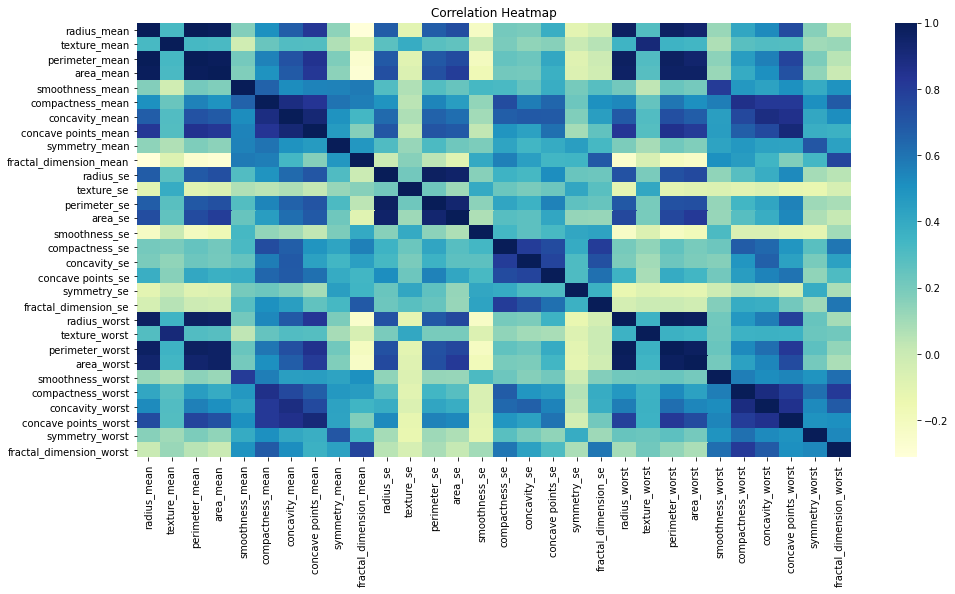

In [12]:
plt.figure(figsize=(16, 8))
sns.heatmap(corr,cmap="YlGnBu")
plt.title("Correlation Heatmap")

In [13]:
#pca
#scaling the variables
features = list(dataset.columns[2:])
# Separating out the features
x = dataset.loc[:, features].values
# Separating out the target
y = dataset.loc[:,['diagnosis']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

C:\Users\DESMOND\anaconda3\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\DESMOND\anaconda3\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [14]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [15]:
finalDf = pd.concat([principalDf, dataset[['diagnosis']]], axis = 1)

NameError: name 'principalDf' is not defined

In [16]:
finalDf.head()

NameError: name 'finalDf' is not defined

NameError: name 'finalDf' is not defined

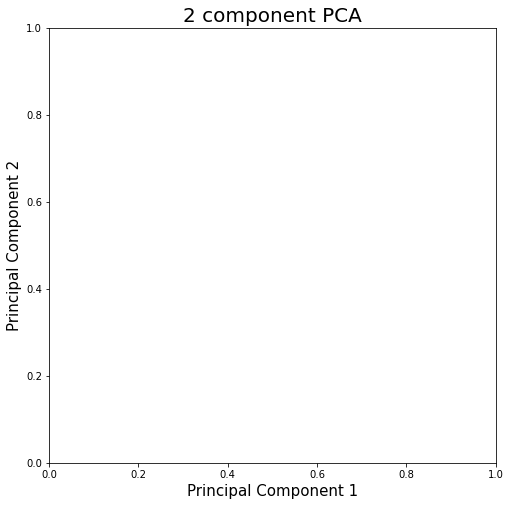

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [18]:
#drop id column
diagnosis_data = dataset.copy()
diagnosis_data = diagnosis_data.drop(['id'],axis=1)
diagnosis_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
#encode diagnosis column (any non-numeric columns in the dataset)
# Malignant = 1
# Benign = 0
le = LabelEncoder()
diagnosis_data['diagnosis'] = le.fit_transform(diagnosis_data['diagnosis'])
diagnosis_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Train-test Split

In [20]:
X = diagnosis_data.drop(["diagnosis"], axis=1)
y = diagnosis_data["diagnosis"]

In [21]:
# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\DESMOND\anaconda3\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\DESMOND\anaconda3\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [22]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
)


### Train and predict using random forest classifier

In [26]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=100)

In [27]:
# Train the model using the training sets
classifier.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [28]:
# predictin on the test set
y_pred = classifier.predict(X_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [29]:
rf_cnm=confusion_matrix(y_test, y_pred)
print('log_results') 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [30]:
# create heatmap
sns.heatmap(rf_cnm/np.sum(rf_cnm), annot=True ,fmt='.2%', cmap='Blues')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

NameError: name 'rf_cnm' is not defined

In [31]:
# get importance
importances = classifier.feature_importances_
labels = X.columns
feature_df = pd.DataFrame(list(zip(labels, importances)), columns=["feature", "importance"])
feature_df = feature_df.sort_values(by='importance', ascending=False, )

# image formatting
axis_fs = 18  # fontsize
title_fs = 22  # fontsize
sns.set(style="whitegrid")

plt.figure(figsize=(16, 8))
ax = sns.barplot(x="importance", y="feature", data=feature_df)
ax.set_xlabel('Importance', fontsize=axis_fs)
ax.set_ylabel('Feature', fontsize=axis_fs)  # ylabel
ax.set_title('Random Forest feature importance', fontsize=title_fs)


plt.tight_layout()
# plt.savefig("feature_importance.png", dpi=120)
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [32]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X.columns[(sel.get_support())]
selected_feat

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [33]:
diagnosis_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [34]:
#filter original dataset to retain the important variables
#the dimension of the dataset has reduced from 569,32 to 569,9
causal_data = diagnosis_data[['diagnosis','area_mean', 'concavity_mean', 'concave_points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave_points_worst']].copy()
causal_data.head()

KeyError: "['concave_points_mean', 'concave_points_worst'] not in index"

In [35]:
causal_data.shape

NameError: name 'causal_data' is not defined

## Causal Graph

In [36]:
sm = from_pandas(causal_data, w_threshold=0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

NameError: name 'from_pandas' is not defined

In [37]:
sm = from_pandas_lasso(causal_data, w_threshold=0.8, beta=0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

NameError: name 'from_pandas_lasso' is not defined

In [38]:
#add constraint to diagnosis without lasso regularization
sm_constrained = from_pandas(causal_data, tabu_parent_nodes=['diagnosis'], w_threshold=0.8)
viz = plot_structure(
    sm_constrained,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

NameError: name 'from_pandas' is not defined

In [39]:
#put constraint on diagnosis column with lasso regularization
sm_lasso_constrained = from_pandas_lasso(causal_data, tabu_parent_nodes=['diagnosis'], w_threshold=0.8, beta=0.8)
viz = plot_structure(
    sm_lasso_constrained,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

NameError: name 'from_pandas_lasso' is not defined

## Jaccard similarity index

In [40]:
#similarity between a graph plotted without lasso regularization and one plotted with lasso regularization
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)),3)

jaccard_similarity(sm_constrained.edges(), sm_lasso_constrained.edges())

NameError: name 'sm_constrained' is not defined

In [41]:
# Using Union

def Jaccar_score(g, h):    
    i = set(g).intersection(set(h))
    u = set(g).union(set(h))
    return len(i) / float(len(u))

In [42]:
# split and test the data rowwise

df_1 = causal_data.iloc[:100,:]
df_2 = causal_data.iloc[:300,:]
df_3 = causal_data.iloc[:,:] 

NameError: name 'causal_data' is not defined

In [43]:
sm_df1 = from_pandas_lasso(df_1, tabu_parent_nodes=['diagnosis'], w_threshold=0.8, beta=0.8)
viz = plot_structure(
    sm_df1,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

NameError: name 'from_pandas_lasso' is not defined

In [44]:
sm_df2 = from_pandas_lasso(df_2, tabu_parent_nodes=['diagnosis'], w_threshold=0.8, beta=0.8)
viz = plot_structure(
    sm_df2,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

NameError: name 'from_pandas_lasso' is not defined

In [45]:
# similarity between df_1 and df_2
jaccard_similarity(sm_df1.edges(), sm_df2.edges())

NameError: name 'sm_df1' is not defined

In [46]:
sm_df3 = from_pandas_lasso(df_3, tabu_parent_nodes=['diagnosis'], w_threshold=0.8, beta=0.8)
viz = plot_structure(
    sm_df3,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


NameError: name 'from_pandas_lasso' is not defined

In [47]:
# similarity between df_2 and df_3
jaccard_similarity(sm_df2.edges(), sm_df3.edges())

NameError: name 'sm_df2' is not defined

In [48]:
#similarity using union and intersection
Jaccar_score(sm_df2.edges(), sm_df3.edges())

NameError: name 'sm_df2' is not defined

In [49]:
sm_lasso_constrained.add_edge("concave_points_mean", "diagnosis")
sm_lasso_constrained.add_edge("concave_points_worst", "diagnosis")
sm_lasso_constrained.add_edge("area_worst", "diagnosis")
sm_lasso_constrained.add_edge("area_mean", "diagnosis")
sm_lasso_constrained.add_edge("perimeter_worst", "diagnosis")
sm_lasso_constrained.add_edge("concavity_mean", "area_mean")

NameError: name 'sm_lasso_constrained' is not defined

In [50]:
viz = plot_structure(
    sm_lasso_constrained,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

NameError: name 'plot_structure' is not defined

## Bayesian Network

In [51]:
discretised_data = causal_data.copy()

data_vals = {col: causal_data[col].unique() for col in causal_data.columns}

diagnosis_map = {v: 'benign' if v == [0]
            else 'malignant' for v in data_vals['diagnosis']}

NameError: name 'causal_data' is not defined

In [52]:
discretised_data["diagnosis"] = discretised_data["diagnosis"].map(diagnosis_map)


NameError: name 'discretised_data' is not defined

In [53]:
for i in list(discretised_data.columns[1:]):
  map  = {v: 'small' if v <= (discretised_data[str(i)].max()-discretised_data[str(i)].min())/2
            else 'large' for v in data_vals[str(i)]}
  discretised_data[str(i)] = discretised_data[str(i)].map(map)


NameError: name 'discretised_data' is not defined

In [54]:
discretised_data.head()

NameError: name 'discretised_data' is not defined

In [55]:
# Split 80% train and 20% test
train, test = train_test_split(discretised_data, train_size=0.8, test_size=0.2, random_state=7)

NameError: name 'discretised_data' is not defined

In [56]:
bn = BayesianNetwork(sm_lasso_constrained)

NameError: name 'BayesianNetwork' is not defined

In [57]:
bn = bn.fit_node_states(discretised_data)

NameError: name 'bn' is not defined

In [58]:
bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

NameError: name 'bn' is not defined

In [59]:
pred = bn.predict(test, 'diagnosis')

NameError: name 'bn' is not defined

In [60]:
true = np.where(test['diagnosis'] == 'malignant', 1, 0)
pred = np.where(pred == 'malignant', 1, 0)

NameError: name 'test' is not defined

In [61]:
print('Recall: {:.2f}'.format(recall_score(y_true=true, y_pred=pred)))
print('Accuracy: {:.2f} '.format(accuracy_score(y_true=true, y_pred=pred)))
print('Precision: {:.2f} '.format(precision_score(y_true=true, y_pred=pred)))

NameError: name 'true' is not defined

In [62]:
classification_report(bn, test, "diagnosis")

NameError: name 'classification_report' is not defined

In [63]:
roc, auc = roc_auc(bn, test, "diagnosis")
print(auc)

NameError: name 'roc_auc' is not defined

In [64]:
#conditional probalities
bn.cpds["diagnosis"]

NameError: name 'bn' is not defined

## Querying 

In [65]:
#fit the data on the entire dataset
bn = bn.fit_cpds(discretised_data, method="BayesianEstimator", bayes_prior="K2")

NameError: name 'bn' is not defined

In [66]:
ie = InferenceEngine(bn)
marginals = ie.query()
marginals["diagnosis"]

NameError: name 'InferenceEngine' is not defined

In [67]:
marginals_small = ie.query({"area_mean": "small"})
marginals_large = ie.query({"area_mean": "large"})
print("Marginal diagnosis | Small area mean", marginals_small["diagnosis"])
print("Marginal diagnosis | Large area mean", marginals_large["diagnosis"])

NameError: name 'ie' is not defined